# 1. 데이터 전처리와 EDA(탐색적 데이터 분석)
## 1) 데이터 전처리란?
* 분석할 데이터 원본을 머신러닝 및 딥러닝을 할 수 있도록 준비하는 과정
  * 데이터 타입 변환(문자/숫자)
  * 결측값 처리 - 삭제/대치
  * 이상값 탐지 - 표준편차 3% 이하, 97% 이상 되는 값들, 4분위수 25% - IQR*1.5 미만이거나 75% + IQR*1.5초과인가
  * 구간화 - 나이 등등
  * 정규화 / 표준화
  * 카테고리 변수(범주형) 레이블 인코딩(더미변수화, 원핫인코딩)
  * 종속변수의 클래스 편향 수정(클래스 불균형 문제 해결)
  * EDA를 통한 특성 생성 및 삭제

## 2) 데이터 전처리는 머신러닝을 통해 도출되는 모델의 성능에 직접적인 영향을 미친다.
* Garbage in Garbage out

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터 전처리 없이 분석을 시도할 경우 생기는 일

In [718]:
data2 = data.copy()

In [719]:
X2 = data2.drop('Survived', axis=1) # 독립변수를 만들기 위해 Target(종속변수) 삭제 후 X2에 저장
y2 = data2['Survived'] # 종속변수만 y에 저장

In [720]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [721]:
X2.head() # 독립변수

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [722]:
y2.head() # 종속변수

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## 홀드아웃( 훈련데이터와 테스트 데이터로 나눔) 8:2

In [723]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=77)

In [724]:
X_train2.info

<bound method DataFrame.info of      PassengerId  Pclass                                Name     Sex   Age  \
32            33       3            Glynn, Miss. Mary Agatha  female   NaN   
525          526       3                  Farrell, Mr. James    male  40.5   
429          430       3  Pickard, Mr. Berk (Berk Trembisky)    male  32.0   
270          271       1               Cairns, Mr. Alexander    male   NaN   
796          797       1         Leader, Dr. Alice (Farnham)  female  49.0   
..           ...     ...                                 ...     ...   ...   
293          294       3                 Haas, Miss. Aloisia  female  24.0   
235          236       3        Harknett, Miss. Alice Phoebe  female   NaN   
596          597       2          Leitch, Miss. Jessie Wills  female   NaN   
607          608       1         Daniel, Mr. Robert Williams    male  27.0   
727          728       3            Mannion, Miss. Margareth  female   NaN   

     SibSp  Parch             T

In [725]:
X_test2.info

<bound method DataFrame.info of      PassengerId  Pclass                                         Name     Sex  \
100          101       3                      Petranec, Miss. Matilda  female   
426          427       2  Clarke, Mrs. Charles V (Ada Maria Winfield)  female   
425          426       3                       Wiseman, Mr. Phillippe    male   
120          121       2                  Hickman, Mr. Stanley George    male   
768          769       3                          Moran, Mr. Daniel J    male   
..           ...     ...                                          ...     ...   
17            18       2                 Williams, Mr. Charles Eugene    male   
732          733       2                         Knight, Mr. Robert J    male   
375          376       1        Meyer, Mrs. Edgar Joseph (Leila Saks)  female   
772          773       2                            Mack, Mrs. (Mary)  female   
446          447       2            Mellinger, Miss. Madeleine Violet  female

In [726]:
#from sklearn.metrics import accuracy_score
#model2 = DecisionTreeClassifier(max_depth=3, random_state=7)
#model2.fit(X_train2, y_train2) # 알고리즘이 학습할 수 있도록 훈련시켜라(fit) 컴퓨터는 문자를 인식하지 못해서 에러가 남.
#pred2 = model2.predict(X_test2)
#print(accuracy_score(y_test2,pred2))

In [727]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [728]:
data.info() # 결측값 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [729]:
data.describe() # 문자형 데이터는 보여주지 않고 기본적으로 숫자형 데이터만 보여줌.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. 결측값 확인 및 처리
* 결측값은 존재하지 않는 데이터를 의미한다.
* NA, NaN, Null, 공백, -1로 표시됨.
* 결측값은 삭제하는 것이 일반적
* 결측값을 무조건 삭제하면 다른 데이터도 같이 삭제되기 때문에 데이터 손실이 커질 수 있다.
* 결측값을 무조건 삭제할 것이 아니라 보관해서 결측값을 메우는 작업을 해줌.

In [730]:
data.isna().sum() # 결측값이 있는 행을 볼 수 있다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [731]:
data.dropna() # 할당은 안 됨. 너무 많은 삭제가 있어서 많이 쓰지는 않는다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## 1) 평균 대치법 : 컬럼에 있는 데이터 값의 평균으로 결측값을 대치한다.

### fillna(대치값)

In [732]:
data['Age'].mean()

29.69911764705882

In [733]:
# fillna(대치값) 평균
data['Age'].fillna(data['Age'].mean()).tail()

886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [734]:
# fillna(대치값) 평균
data['Age'].median()

28.0

In [735]:
data['Age'].fillna(data['Age'].median()).tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [736]:
data['Age'].value_counts() # 최빈값을 구하고 싶으면 value_counts

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [737]:
# fillna(대치값) 최빈값: 가장 많이 나온 나이
data['Age'].fillna(24).tail()

886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, dtype: float64

### (1) Scikit-learn의 SimpleImputer로 평균, 중앙, 최빈값으로 대치하기

In [738]:
from sklearn.impute import SimpleImputer

* mean값으로 대치

In [739]:
data['Age'].isna() == True

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [740]:
data[data['Age'].isna() == True] # 결측값이 있는 애들만 가져올 수 있어.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [741]:
data[data['Age'].isna() == True].index # 결측값이 있는 행의 인덱스를 뽑을 수 있어.

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [742]:
na_indices = data[data['Age'].isna() == True].index

In [743]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0] # 넘파이로 넘어왔기 때문에 shape을 맞춰주는 게 중요해?(무슨 말이지?)


array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [744]:
n = np.arange(10)
n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [745]:
n.reshape(5,-1) # -1은 자동으로 계산하라는 뜻

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [746]:
data.iloc[na_indices] # 결측값으로 묶어놨던 애들에게 평균값으로 부여해주기.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* median으로 대치

In [747]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

* 최빈값으로 대치

In [748]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  ,
       31.  , 24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  ,
       19.  , 24.  , 24.  , 40.  , 24.  , 24.  , 66.  , 28.  , 42.  ,
       24.  , 21.  , 18.  , 14.  , 40.  , 27.  , 24.  ,  3.  , 19.  ,
       24.  , 24.  , 24.  , 24.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 24.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 21.  , 33.  , 37.  , 28.  , 21.  , 24.  ,
       38.  , 24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 24.  , 32.5 , 32.5 , 54.  , 12.  ,
       24.  , 24.  ,

### (2) K-최근접이웃(KNN)을 활용해서 결측값 대치
* 단순확률대치법

In [749]:
from sklearn.impute import KNNImputer

In [750]:
KNN_imputer = KNNImputer(n_neighbors=1) #n_neighbors=1 기본은 5개야.
data['Age'] = KNN_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

In [751]:
data.iloc[na_indices]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


### 컬럼 내 결측값이 전체 데이터의 50%가 넘으면 열 자체를 삭제한다.

In [752]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [753]:
data['Cabin'].isna().sum()

687

In [754]:
687/891*100 #Cabin은 77%나 결측값이 있음.

77.10437710437711

* 컬럼 삭제하기
  * 데이터프레임.drop('컬럼명', axis=1)
* 행 삭제하기
  * 데이터프레임.drop(인덱스)
* inplace=True (재할당 없이 바로 반영)  

In [755]:
data.drop(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [756]:
data.drop('Cabin', axis=1, inplace=True) # 재할당을 하거나 inplace=True로 데이터를 저장할 수 있음.

In [757]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [758]:
data.info() # Cabin 없어짐, Embarked에만 결측값이 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [759]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [760]:
data['Embarked'].value_counts() # 유일값의 수를 세어줌. # S가 제일 많으니까 S로 매꿔주면 되겠다고 생각.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [761]:
data['Embarked'].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [762]:
data['Embarked'] = data['Embarked'].fillna("S") # 재할당을 해야지 결측값이 채워짐

In [763]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [764]:
# 여기까지 결측값 대치 완료. Cabin은 삭제함.

## 이상값 탐지 및 처리 

In [765]:
data.describe() # 4분위수를 볼 수 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

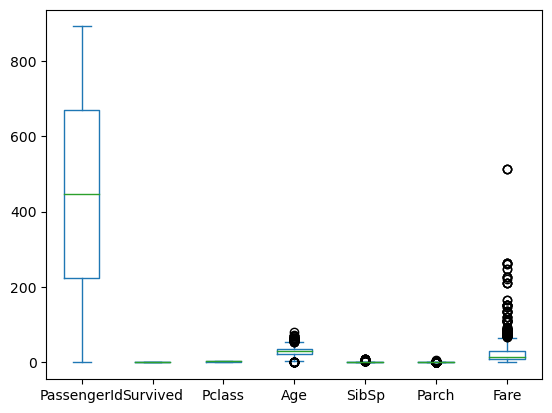

In [766]:
data.plot(kind='box') # 박스플랏 위 아래에 찍긴 동그라미들이 이상값이다.

<Axes: >

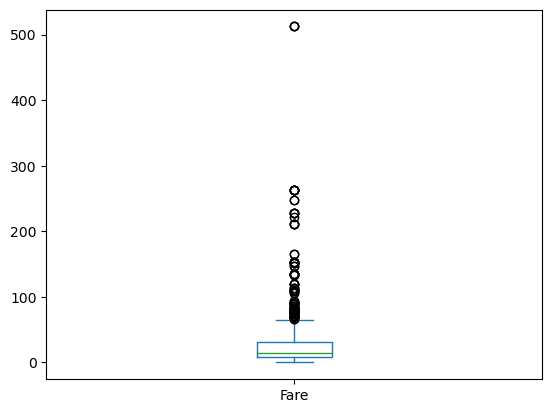

In [767]:
data['Fare'].plot(kind='box')

In [768]:
x = data.describe()

In [769]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [770]:
# 상담 다녀옴

In [771]:
# IQR
print(x.loc['75%'] + (1.5*(x.loc['75%']-x.loc['25%'])))
print(x.loc['25%'] - (1.5*(x.loc['75%']-x.loc['25%'])))

PassengerId    1336.0000
Survived          2.5000
Pclass            4.5000
Age              54.5000
SibSp             2.5000
Parch             0.0000
Fare             65.6344
dtype: float64
PassengerId   -444.000
Survived        -1.500
Pclass           0.500
Age              2.500
SibSp           -1.500
Parch            0.000
Fare           -26.724
dtype: float64


In [772]:
out_max = x.loc['75%'] + (1.5*(x.loc['75%']-x.loc['25%']))
out_min = x.loc['25%'] - (1.5*(x.loc['75%']-x.loc['25%']))

In [773]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [774]:
ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값','하한값'])
ol_result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
상한값,1336.0,2.5,4.5,54.5,2.5,0.0,65.6344
하한값,-444.0,-1.5,0.5,2.5,-1.5,0.0,-26.7240


In [775]:
result = pd.concat([x, ol_result])
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [776]:
# 아웃라이어를 계산하는 함수. 우리가 만들어야 해.
def outlier(x):
    x = x.describe()
    out_max = x.loc['75%'] + (1.5*(x.loc['75%']-x.loc['25%']))
    out_min = x.loc['25%'] - (1.5*(x.loc['75%']-x.loc['25%']))
    ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값','하한값'])
    result=pd.concat([x, ol_result])
    return result

In [777]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


* Fare 컬럼에 이상값이 있음
* 4분위수로 계산해서 상한 최대값

In [778]:
data[data['Fare'] > 65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


분석결과 정리
* 필터링 결과 Fare가 이상값을 갖는 데이터는 SibSp, Parch 컬럼에 1 이상의 데이터가 있음.
* SibSp: 형제, 자매 수, Parch: 부모자식
* 형제 자매나 부모 자식이 있는 경우 표를 한 사람이 다른 가족 구성원의 표까지 같이 구매했을 가능성이 있음.
* SibSp, Parch를 family 컬럼으로 합치고 Fare를 그 수로 나누면 정상적인 fare 가격 산출 가능.

SibSp, Parch를 family 컬럼으로 합치기(파생변수 만들기)

In [779]:
data['family'] = data['SibSp'] + data['Parch'] # 새로운 변수 만들때는 데이터프레임.['']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### fare를 family수로 나누어 표 1개의 가격 산출해 adj_fare 컬럼 생성

In [780]:
data['adj_fare']= data['Fare'] / data['family']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,inf
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,inf


In [781]:
outlier(data)

C:\Users\hi\anaconda3\envs\testenv\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,876.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,inf
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,NaN
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.320833
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,23.750000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,NaN
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,NaN
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,inf
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,2.500000,NaN
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,-1.500000,NaN


In [15]:
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [782]:
data[data['adj_fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,1,512.3292


In [783]:
891 - data['Ticket'].nunique() # 210명정도는 티켓 번호가 같은 사람들이 있음.

210

In [784]:
512.3292 / 2

256.1646

* 가장 비싼 1등실 가격은 256.3292 예상 하지만 명확하지 않음. EDA를 통해서 값이 이상할 거 같으면 찾아내서 처리를 해줘야 해.

## Feature Enginnering, Feature Selection
* 변수선택
* 파생변수 생성

In [785]:
data[(data['Pclass'] == 1)]['adj_fare'].median()

247.5208

* Fare는 불확실성이 커서 사용 불가
* Ticket, Fare, adj_fare 사용 불가

# 분석 목적: 고객 정보를 통해 생존 여부 판별
* target변수(종속변수):  Survived

* 분석에 사용될 변수 선택

In [786]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family', 'adj_fare'],
      dtype='object')

In [787]:
# 컬럼 없애기 : 변수를 복사한 후 이중괄호 안에 컬럼들을 없애서 data에 다시 할당
data = data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family']] # 컬럼 없애기
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family
0,1,0,3,male,22.0,S,1
1,2,1,1,female,38.0,C,1
2,3,1,3,female,26.0,S,0
3,4,1,1,female,35.0,S,1
4,5,0,3,male,35.0,S,0


groupby를 통해서 독립변수와 종속변수의 관계 파악

In [18]:
data.groupby(['Pclass'])['Survived'].value_counts(sort=False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

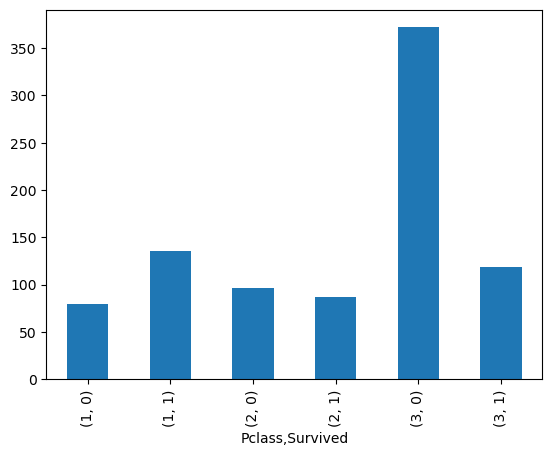

In [789]:
data.groupby(['Pclass'])['Survived'].value_counts(sort=False).plot(kind='bar')

* Pclass별 생존율 구하기

In [790]:
# Pclass가 `1일 때 생존율 63%
136/(80+136) * 100

62.96296296296296

In [791]:
# Pclass가 2일 때 생존율 47%
87/(97+87) * 100

47.28260869565217

In [792]:
# Pclass가 3일 때 생존율 24% 
119/(372+119) * 100

24.236252545824847

결론
* Pclass가 높으면(1등급) 생존률이 높다.

In [793]:
data.groupby('Sex')['Survived'].value_counts(sort=False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

In [794]:
# 여성일 때의 생존율 74%
233/(233+81)*100

74.20382165605095

In [795]:
# 남성일 때 생존율 19%
109/(468+109)*100

18.890814558058924

* 여성인 경우 남성보다 생존율이 높다.

In [796]:
data['Age'].nunique() # 나이를 구간화 시키자!

89

In [797]:
# 0~9, 10~19, 21~29, 30~39, 40~49, ... 80 나이를 구간화하기

In [798]:
def age_dist(age):
    if 0 <= age < 10:
        return 'under 10s'
    elif 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'


In [799]:
#data['Age'].apply(age_dist) # 리스트 자료이니까 For문으로 하나하나 꺼내주고 if문으로 구간을 나눌 수 있어.

In [800]:
# 재할당 필요
#data['Age'] = data['Age'].apply(age_dist) 
#data.loc[:,'Age'] = data['Age'].apply(age_dist)  warning이 뜨면 이렇게 하면 돼.

In [801]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

* cut함수를 사용해 나이의 구간 나누기

In [802]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
pd.cut(data['Age'], bins, right=False)

0      [20, 30)
1      [30, 40)
2      [20, 30)
3      [30, 40)
4      [30, 40)
         ...   
886    [20, 30)
887    [10, 20)
888    [20, 30)
889    [20, 30)
890    [30, 40)
Name: Age, Length: 891, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

In [803]:
data['Age'] = pd.cut(data['Age'], bins, right=False)

C:\Users\hi\AppData\Local\Temp\ipykernel_6728\1218894262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = pd.cut(data['Age'], bins, right=False)


In [804]:
agedata = data.groupby('Age')['Survived'].value_counts(sort=False)

In [805]:
agedata.loc[[0,10]]

Age       Survived
[0, 10)   0           24
          1           38
[10, 20)  0           61
          1           41
Name: count, dtype: int64

In [806]:
agedata.index

MultiIndex([( [0, 10), 0),
            ( [0, 10), 1),
            ([10, 20), 0),
            ([10, 20), 1),
            ([20, 30), 0),
            ([20, 30), 1),
            ([30, 40), 0),
            ([30, 40), 1),
            ([40, 50), 0),
            ([40, 50), 1),
            ([50, 60), 0),
            ([50, 60), 1),
            ([60, 70), 0),
            ([60, 70), 1),
            ([70, 80), 0),
            ([70, 80), 1)],
           names=['Age', 'Survived'])

In [807]:
#나이컬럼을 만들고 나이컬럼에 따라서 생존율을 구해보자. 나이별 컬럼을 어떻게 만들지? 더미변수 만드는 법?

In [817]:
surv_ratio_result={}
for idx2, i in zip(agedata.index, agedata):
    if idx2[1] ==0:
        dead = i
    elif idx2[1] ==1:
        surv = i
        surv_ratio = surv / (dead + surv) * 100
        print(f"{idx2[0]}의 생존율: ", surv_ratio)
        surv_ratio_result[idx2[0]] = surv_ratio
surv_ratio_result

[0, 10)의 생존율:  61.29032258064516
[10, 20)의 생존율:  40.19607843137255
[20, 30)의 생존율:  32.49370277078086
[30, 40)의 생존율:  43.712574850299404
[40, 50)의 생존율:  38.20224719101123
[50, 60)의 생존율:  41.66666666666667
[60, 70)의 생존율:  31.57894736842105
[70, 80)의 생존율:  0.0


{Interval(0, 10, closed='left'): 61.29032258064516,
 Interval(10, 20, closed='left'): 40.19607843137255,
 Interval(20, 30, closed='left'): 32.49370277078086,
 Interval(30, 40, closed='left'): 43.712574850299404,
 Interval(40, 50, closed='left'): 38.20224719101123,
 Interval(50, 60, closed='left'): 41.66666666666667,
 Interval(60, 70, closed='left'): 31.57894736842105,
 Interval(70, 80, closed='left'): 0.0}

In [818]:
surv_ratio_result

{Interval(0, 10, closed='left'): 61.29032258064516,
 Interval(10, 20, closed='left'): 40.19607843137255,
 Interval(20, 30, closed='left'): 32.49370277078086,
 Interval(30, 40, closed='left'): 43.712574850299404,
 Interval(40, 50, closed='left'): 38.20224719101123,
 Interval(50, 60, closed='left'): 41.66666666666667,
 Interval(60, 70, closed='left'): 31.57894736842105,
 Interval(70, 80, closed='left'): 0.0}

In [809]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family
0,1,0,3,male,"[20, 30)",S,1
1,2,1,1,female,"[30, 40)",C,1
2,3,1,3,female,"[20, 30)",S,0
3,4,1,1,female,"[30, 40)",S,1
4,5,0,3,male,"[30, 40)",S,0


In [810]:
data['Age']

0      [20, 30)
1      [30, 40)
2      [20, 30)
3      [30, 40)
4      [30, 40)
         ...   
886    [20, 30)
887    [10, 20)
888    [20, 30)
889    [20, 30)
890    [30, 40)
Name: Age, Length: 891, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

In [827]:
# Age에서 연령대를 추출
# surv.ratio_result에서 Age 연령대에 해당하는 생존률 추출
# surv_ratio 컬럼을 만들어 연령대별 생존율 입력
data['surv_ratio_by_age'].apply(lambda x:surv_ratio_result[x])
data.head()

KeyError: 'surv_ratio_by_age'

In [820]:
data['Age'], surv_ratio

(0      [20, 30)
 1      [30, 40)
 2      [20, 30)
 3      [30, 40)
 4      [30, 40)
          ...   
 886    [20, 30)
 887    [10, 20)
 888    [20, 30)
 889    [20, 30)
 890    [30, 40)
 Name: Age, Length: 891, dtype: category
 Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)],
 0.0)

In [821]:
def surv(age,  ratio):
    return ratio[age]

In [825]:
data['Age'].apply(lambda x:surv_ratio_result[x])

0      32.493703
1      43.712575
2      32.493703
3      43.712575
4      43.712575
         ...    
886    32.493703
887    40.196078
888    32.493703
889    32.493703
890    43.712575
Name: Age, Length: 891, dtype: category
Categories (8, float64): [61.290323 < 40.196078 < 32.493703 < 43.712575 < 38.202247 < 41.666667 < 31.578947 < 0.000000]

In [ ]:
# 생존율
print(38/(38+24)*100)# under 10
print(41/(41+61)*100) # 10s
print(129/(129+268)*100) # 20s
print(73/(73+94)*100) # 30s
print(34/(34+55)*100) # 40s
print(20/(20+28)*100) # 50s
print(6/(6+13)*100) # 60s
print(0/(0+6)*100) # 70s
print(1/(1+0)*100) # 80s

나이는 생존율과 관련이 있다. 특히, 10세 미만인 경우에 생존율이 높았다.

Pclass별 sex별 생존율

In [828]:
data.groupby(["Pclass", "Sex"])["Survived"].value_counts(sort=False)

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

<Axes: xlabel='Pclass,Sex,Survived'>

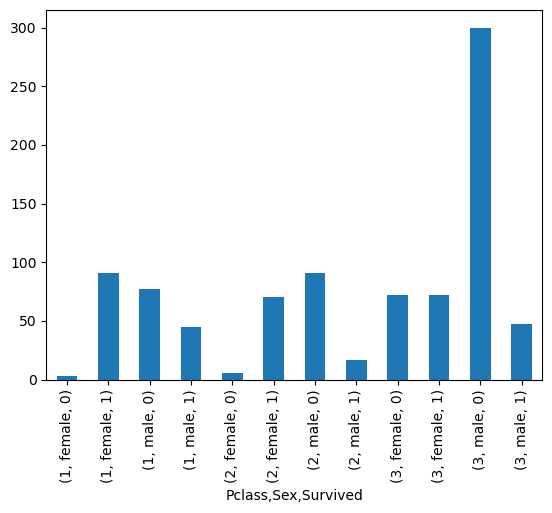

In [830]:
data.groupby(["Pclass", "Sex"])["Survived"].value_counts(sort=False).plot(kind='bar')

### Embarked에 따른 생존율

In [833]:
data.groupby('Embarked')['Survived'].value_counts(sort=False)

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

<Axes: xlabel='Embarked,Survived'>

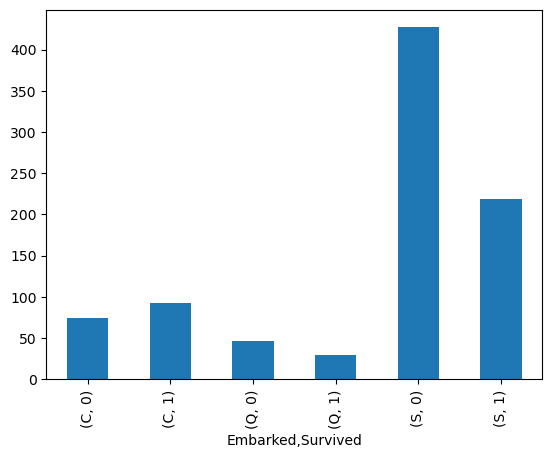

In [832]:
data.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind='bar')

In [834]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### family에 따른 생존율

In [835]:
data.groupby("family")['Survived'].value_counts()

family  Survived
0       0           374
        1           163
1       1            89
        0            72
2       1            59
        0            43
3       1            21
        0             8
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: count, dtype: int64

<Axes: xlabel='family,Survived'>

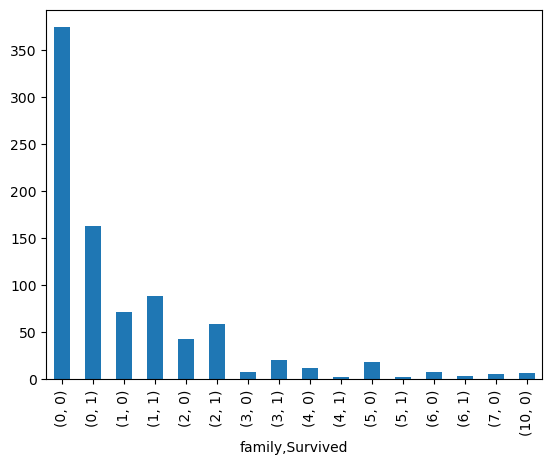

In [837]:
data.groupby("family")['Survived'].value_counts(sort=False).plot(kind='bar')

* 크게 영향이 있을 거 같지는 않다.

# 파생변수, 더미변수 만들기

In [839]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family
0,1,0,3,male,"[20, 30)",S,1
1,2,1,1,female,"[30, 40)",C,1
2,3,1,3,female,"[20, 30)",S,0
3,4,1,1,female,"[30, 40)",S,1
4,5,0,3,male,"[30, 40)",S,0


## 카테고리변수 처리에 따라 3가지 데이터셋 생성
* data1 - pclass를 현재 그대로 유지. 나머지를 더미변수화
* data2 - Pclass를 서열변수로 처리해 1->3, 1->3으로 변경
* data3 - Pclass를 더미변수화

In [854]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

In [855]:
pd.get_dummies(data, columns=['Sex','Age','Embarked'], drop_first=True) # 더미변수 만들기

,PassengerId,Survived,Pclass,family,Sex_male,"Age_[10, 20)","Age_[20, 30)","Age_[30, 40)","Age_[40, 50)","Age_[50, 60)","Age_[60, 70)","Age_[70, 80)",Embarked_Q,Embarked_S
0,1,0,3,1,True,False,True,False,False,False,False,False,False,True
1,2,1,1,1,False,False,False,True,False,False,False,False,False,False
2,3,1,3,0,False,False,True,False,False,False,False,False,False,True
3,4,1,1,1,False,False,False,True,False,False,False,False,False,True
4,5,0,3,0,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,True,False,True,False,False,False,False,False,False,True
887,888,1,1,0,False,True,False,False,False,False,False,False,False,True
888,889,0,3,3,False,False,True,False,False,False,False,False,False,True
889,890,1,1,0,True,False,True,False,False,False,False,False,False,False


In [856]:
data1 = pd.get_dummies(data, columns=['Sex','Age','Embarked'], drop_first=True)

In [857]:
data1.head(2)

,PassengerId,Survived,Pclass,family,Sex_male,"Age_[10, 20)","Age_[20, 30)","Age_[30, 40)","Age_[40, 50)","Age_[50, 60)","Age_[60, 70)","Age_[70, 80)",Embarked_Q,Embarked_S
0,1,0,3,1,True,False,True,False,False,False,False,False,False,True
1,2,1,1,1,False,False,False,True,False,False,False,False,False,False


In [858]:
# Pclass의 1이 서열이 가장 높으므로 1에 높은 숫자 부여. 1 -> 3, 3 -> 1
data2['Pclass'] = data2['Pclass'].replace({1:3, 3:1}) # Pclass 3->1로 바꾸고, Pclass의 1->3바꾸기.

In [859]:
data2.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,family
0,1,0,1,male,"[20, 30)",S,1
1,2,1,3,female,"[30, 40)",C,1


In [860]:
data2 = pd.get_dummies(data2, columns=['Sex','Age','Embarked'], drop_first=True)
data2.head()

,PassengerId,Survived,Pclass,family,Sex_male,"Age_[10, 20)","Age_[20, 30)","Age_[30, 40)","Age_[40, 50)","Age_[50, 60)","Age_[60, 70)","Age_[70, 80)",Embarked_Q,Embarked_S
0,1,0,1,1,True,False,True,False,False,False,False,False,False,True
1,2,1,3,1,False,False,False,True,False,False,False,False,False,False
2,3,1,1,0,False,False,True,False,False,False,False,False,False,True
3,4,1,3,1,False,False,False,True,False,False,False,False,False,True
4,5,0,1,0,True,False,False,True,False,False,False,False,False,True


In [861]:
data3 = pd.get_dummies(data3, columns=['Pclass','Sex','Age','Embarked'], drop_first=True)

In [862]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PassengerId   891 non-null    int64
 1   Survived      891 non-null    int64
 2   Pclass        891 non-null    int64
 3   family        891 non-null    int64
 4   Sex_male      891 non-null    bool 
 5   Age_[10, 20)  891 non-null    bool 
 6   Age_[20, 30)  891 non-null    bool 
 7   Age_[30, 40)  891 non-null    bool 
 8   Age_[40, 50)  891 non-null    bool 
 9   Age_[50, 60)  891 non-null    bool 
 10  Age_[60, 70)  891 non-null    bool 
 11  Age_[70, 80)  891 non-null    bool 
 12  Embarked_Q    891 non-null    bool 
 13  Embarked_S    891 non-null    bool 
dtypes: bool(10), int64(4)
memory usage: 36.7 KB


In [ ]:
# 내껀 surv_ratio_by_age가 없어. surv_ratio_by_age 가 category로 나오니까 int로 변형해주고있어.

# 데이터를 훈련데이터/테스트 데이터로 나누기
* 홀드아웃

In [863]:
from sklearn.model_selection import train_test_split

In [864]:
# 종속변수는 Survived 
X1 = data1.drop('Survived', axis=1)
X2 = data2.drop('Survived', axis=1)
X3 = data3.drop('Survived', axis=1)
y1 = data1['Survived']
y2 = data2['Survived']
y3 = data3['Survived']

In [865]:
# 관용적으로 X는 대문자로, y는 소문자로 사용함.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=10)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=10)